In [ ]:
# Pyber_IK
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
cdata = "city_data.csv"
city = pd.read_csv(cdata, encoding = "ISO-8859-1")
#by_city = city.groupby(["city"])    //testing
#print(by_city.count())
#city.head()

In [3]:
city_grouped = city.groupby("city")
city_all = pd.DataFrame({
    'type':city_grouped['type'].min(), 
    'driver_count':city_grouped['driver_count'].sum()}
)[['type', 'driver_count']].reset_index()
#city_all.head()


In [15]:
rdata = "ride_data.csv"
ride = pd.read_csv(rdata, encoding = "ISO-8859-1")
#by_city = city.groupby(["city"])    //testing
#print(by_city.count())
#ride.head()


In [5]:
city_ride = pd.merge(city_all, ride, on='city', how='inner')
#city_ride.head()


In [6]:
cr_grouped = city_ride.groupby('city')

cr = pd.DataFrame({
    'type':cr_grouped['type'].min(), 
    'driver_count':cr_grouped['driver_count'].min(), 
    'ride_count':cr_grouped['ride_id'].count(), 
    'fare_average':cr_grouped['fare'].mean()}
)[['type', 'driver_count', 'ride_count', 'fare_average']]

cr.head()

,type,driver_count,ride_count,fare_average
city,,,,
Alvarezhaven,Urban,21,31,23.928710
Alyssaberg,Urban,67,26,20.609615
Anitamouth,Suburban,16,9,37.315556
Antoniomouth,Urban,21,22,23.625000
Aprilchester,Urban,49,19,21.981579


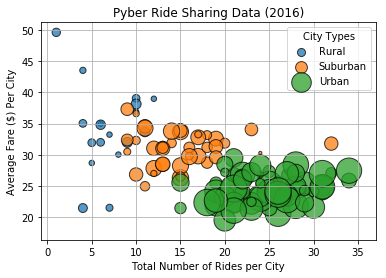

In [7]:
ct_grouped = cr.groupby('type')
for name, group in ct_grouped:
    plt.scatter(group['ride_count'],
            group['fare_average'],
            s=group['driver_count']*10,
            edgecolors='black',
            label=name,
            alpha=0.75)   
                
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides per City')
plt.ylabel('Average Fare ($) Per City')
plt.legend(title='City Types')
plt.grid()
plt.show()
    

In [8]:
# % of Total Fares by City Type
ct_grouped = city_ride.groupby('type')
ct_fare = pd.DataFrame({
    'fare_total':ct_grouped['fare'].sum()}
)[['fare_total']]
#ct_fare

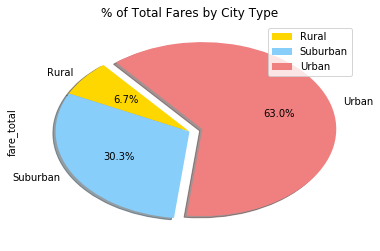

In [9]:
ct_fare.plot.pie("fare_total", 
            explode = (0, 0, 0.1), 
            autopct='%1.1f%%', 
            shadow=True, 
            startangle=130, 
            colors = ["gold","lightskyblue" ,"lightcoral"])
plt.title('% of Total Fares by City Type')
plt.show()

In [10]:
ct_grouped = city_ride.groupby('type')
ct_rides = pd.DataFrame({
    'rides_total':ct_grouped['ride_id'].count()}
)[['rides_total']]
#ct_rides

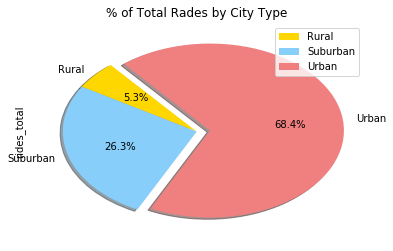

In [11]:
# '% of Total Rades by City Type
ct_rides.plot.pie("rides_total", 
            explode = (0, 0, 0.1), 
            autopct='%1.1f%%', 
            shadow=True, 
            startangle=130, 
            colors = ["gold","lightskyblue" ,"lightcoral"])
plt.title('% of Total Rades by City Type')
plt.show()

In [12]:
cd_grouped = cr.groupby('type')
cd_drivers = pd.DataFrame({
    'drivers_total':cd_grouped['driver_count'].sum()}
)[['drivers_total']]
#cd_drivers

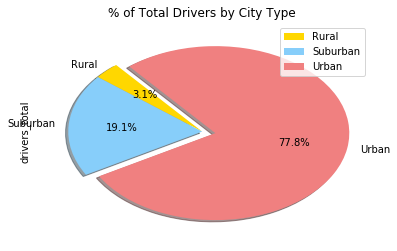

In [13]:
# % of Total Drivers by City Type
cd_drivers.plot.pie("drivers_total", 
            explode = (0, 0, 0.1), 
            autopct='%1.1f%%', 
            shadow=True, 
            startangle=130, 
            colors = ["gold","lightskyblue" ,"lightcoral"])
plt.title('% of Total Drivers by City Type')
plt.show()